<a href="https://colab.research.google.com/github/IgorRachev27/Homework/blob/main/%D1%84%D0%B8%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9%20%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82/%D0%A0%D0%B0%D1%87%D0%B5%D0%B2_%D1%84%D0%B8%D0%BD%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Оценка эффективности маркетинговой стратегии банка

#### Импортируем основные библиотеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score

#### считываем файл с гитхаба по ссылке и сохраняем в переменную df

In [ ]:
path='https://raw.githubusercontent.com/IgorRachev27/Homework/main/bank-additional-full.csv'

In [ ]:
df=pd.read_csv(path, sep=';')

In [ ]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### Изучим данные

In [ ]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

#### Посмотрим на данные типа object где и сколько и каких значений.

In [ ]:
for i in df.columns:
    if df[i].dtypes==object:
        print (i,'\n', df[i].value_counts(),'\n')

job 
 admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64 

marital 
 married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64 

education 
 university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64 

default 
 no         32588
unknown     8597
yes            3
Name: default, dtype: int64 

housing 
 yes        21576
no         18622
unknown      990
Name: housing, dtype: int64 

loan 
 no         33950
yes         6248
unknown      990
Name: loan, dtype: int64 

contact 
 cellular     26144
telephon

#### можно увидеть, что данные типа Nan заменены на строковые типа unknown

#### вернём обратно в Nan и посмотрим графически на данные

In [ ]:
df[df=='unknown']=np.nan

In [ ]:
df[df!=np.nan]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### Импортируем figure для задания размера графика

In [ ]:
from matplotlib.pyplot import figure

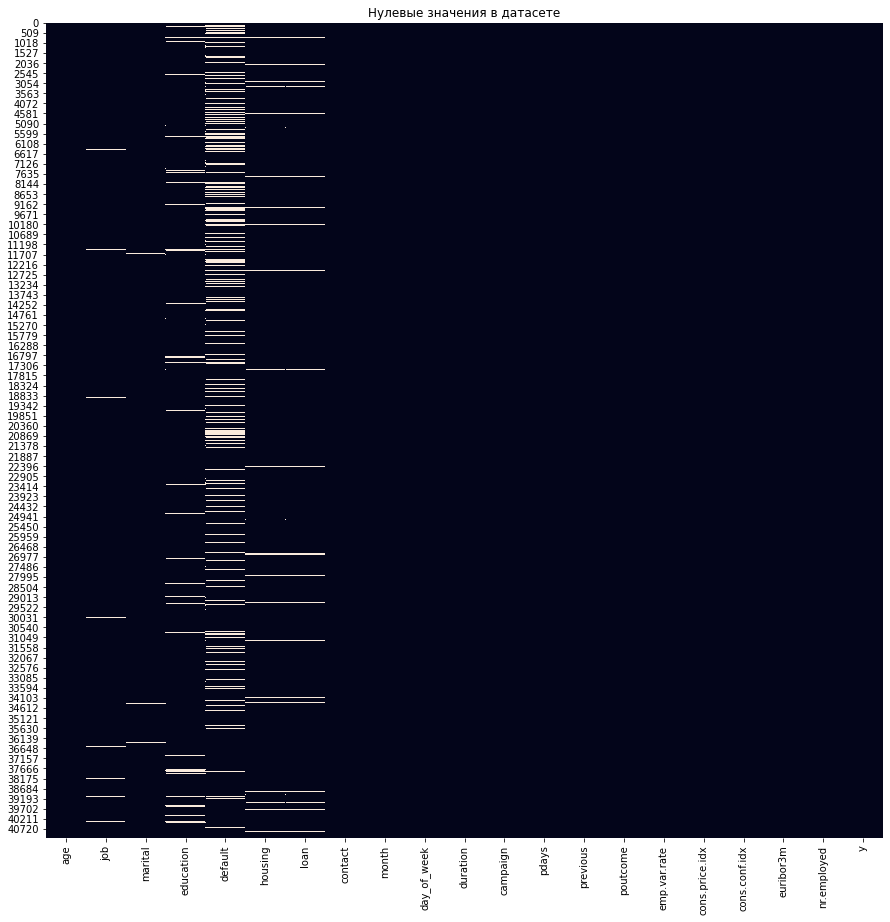

In [ ]:
figure(figsize = (15, 15))
plt.title("Нулевые значения в датасете")
sns.heatmap(df.isnull(), cbar=False)

#### удалим столбец с наибольшим количеством значений Nan

In [ ]:
del df['default']
df

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


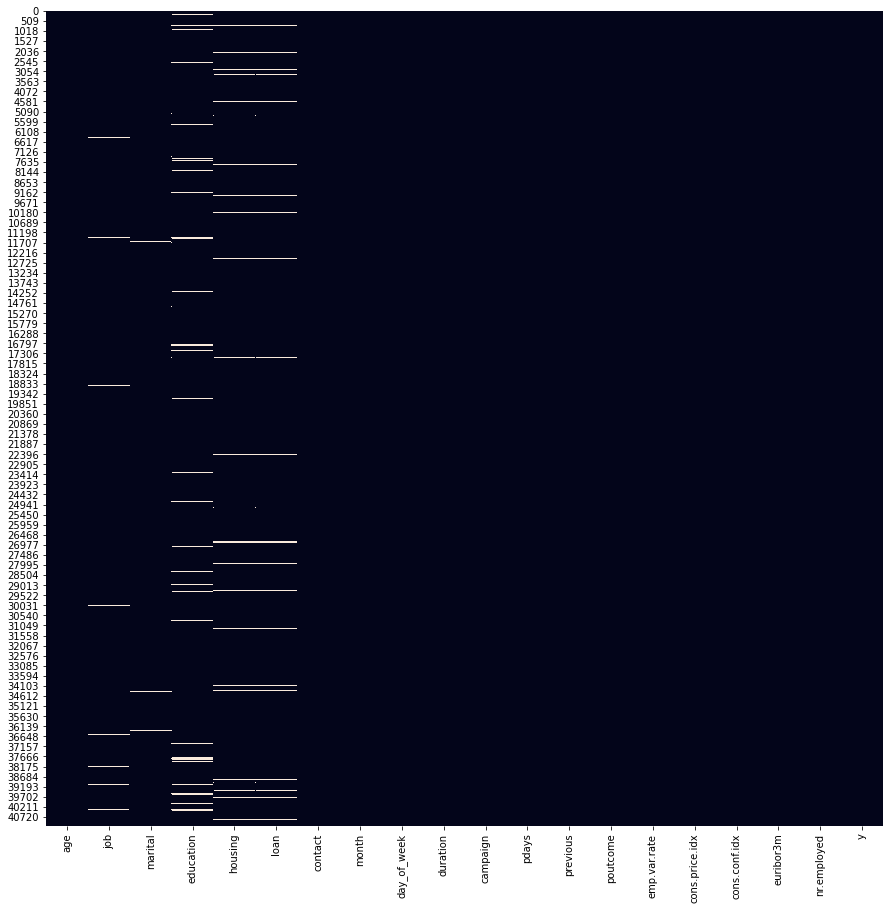

In [ ]:
figure(figsize = (15, 15))
sns.heatmap(df.isnull(), cbar=False)

#### Оставшиеся значения Nan заполним предыдущим значением

In [ ]:
df=df.ffill()
df

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### Произведём энкодинг данных, импортировав preprocessing из библиотеки sklearn

In [ ]:
from sklearn import preprocessing

In [ ]:
def encoding(DF):
    encoded_data=DF.copy()
    encoders={}
    for column in encoded_data:
        if encoded_data[column].dtype==object:
            encoders[column]=preprocessing.LabelEncoder()
            encoded_data[column]=encoders[column].fit_transform(encoded_data[column])
    return encoded_data, encoders

In [ ]:
df, encoders = encoding(df)
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,1,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,1,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


#### Выделим в отдельную переменную значения, которые будем предсказывать и удалим их из датасете

In [ ]:
y=df['y']
del df['y']
df

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,1,3,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,1,3,1,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,1,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,1,3,0,1,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,1,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41184,46,1,1,5,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41185,56,5,1,6,1,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6
41186,44,9,1,5,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6


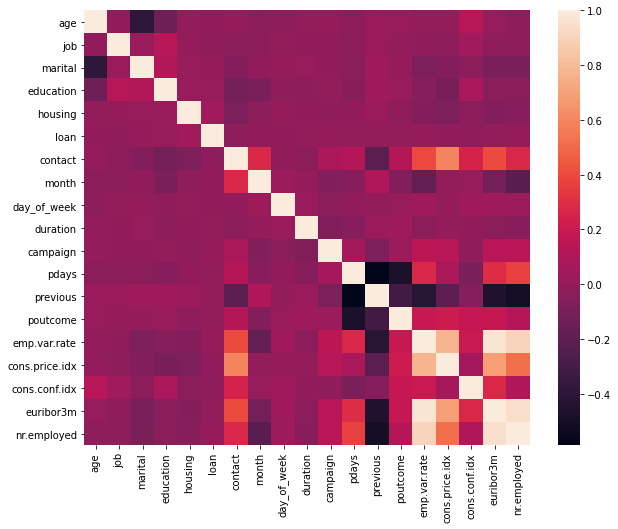

In [ ]:
fig = plt.subplots(figsize=(10,8))    
sns.heatmap(df.corr())

#### Удалим столбец euribor3m из-за высокой корреляции с другими столбцами

In [ ]:
del df['euribor3m']

#### Посмотрим на балансировку классов

Text(0.5, 1.0, 'количество элементов каждого класса в датасете')

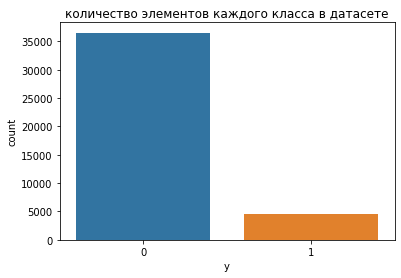

In [ ]:
sns.countplot(y)
plt.title("количество элементов каждого класса в датасете")

#### Видим что классы несбалансированы

## Подготовим наборы данных для дальнейшего исследования

#### Отмасштабируем данные

In [ ]:
from sklearn.preprocessing import scale, MinMaxScaler

In [ ]:
df=scale(df,with_std=True, with_mean=True)

In [ ]:
df

array([[ 1.53303429, -0.18841506, -0.27961059, ...,  0.72272247,
         0.88644656,  0.33167991],
       [ 1.62899323,  0.93865478, -0.27961059, ...,  0.72272247,
         0.88644656,  0.33167991],
       [-0.29018564,  0.93865478, -0.27961059, ...,  0.72272247,
         0.88644656,  0.33167991],
       ...,
       [ 1.53303429,  0.37511986, -0.27961059, ...,  2.05816805,
        -2.22495344, -2.8156966 ],
       [ 0.38152696,  1.50218969, -0.27961059, ...,  2.05816805,
        -2.22495344, -2.8156966 ],
       [ 3.26029527,  0.37511986, -0.27961059, ...,  2.05816805,
        -2.22495344, -2.8156966 ]])

#### сделаем балансировку классов методом SMOTE и ADASYN

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN

augm = SMOTE(random_state=1, k_neighbors=5)
X_S, y_S = augm.fit_resample(df, y)

In [ ]:
augm = ADASYN(random_state=1)
X_A, y_A= augm.fit_resample(df, y)

#### Разделим выборку на обучающую и тестовую по методу train_test_split из библиотеки sklearn

#### Стандартный датасет

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(df), np.array(y), test_size=0.15, random_state=23)

#### Датасет SMOTE

In [ ]:
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_S, y_S, test_size=0.15, random_state=23)

#### Датасет ADASYN

In [ ]:
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X_A, y_A, test_size=0.15, random_state=23)

#### Добавим полиномиальные признаки

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
degree=3
X_tr=PolynomialFeatures(degree).fit_transform(X_train)
X_tst=PolynomialFeatures(degree).fit_transform(X_test)

In [ ]:
degree=3
X_trS=PolynomialFeatures(degree).fit_transform(X_train_S)
X_tstS=PolynomialFeatures(degree).fit_transform(X_test_S)

### Используем библиотеку XGBoost для классификации

#### импортируем все необходимые лементы из соответствующих библиотек

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

#### Оценим модель на датасете для всех видов обработанных данных

#### исходные

In [ ]:
model = XGBClassifier(objective='reg:squarederror')
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='reg:squarederror', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### SMOTE dataset

In [ ]:
model_S = XGBClassifier(objective='reg:squarederror')
model_S.fit(X_train_S, y_train_S)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='reg:squarederror', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### ADASYN dataset

In [ ]:
model_A = XGBClassifier(objective='reg:squarederror')
model_A.fit(X_train_A, y_train_A)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='reg:squarederror', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### polynomial

In [ ]:
model_P = XGBClassifier(objective='reg:squarederror')
model_P.fit(X_tr, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='reg:squarederror', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Сделаем предсказание и выведем любое предсказанное значение для всех видов обработанных данных

#### обычные

In [ ]:
yhat = model.predict(X_test)
print('Prediction: %.3f' % yhat[0])

Prediction: 0.000


#### SMOTE

In [ ]:
yhat_S = model_S.predict(X_test_S)
print('Prediction: %.3f' % yhat_S[0])

Prediction: 0.000


#### ADASYN

In [ ]:
yhat_A = model_A.predict(X_test_A)
print('Prediction: %.3f' % yhat_A[0])

Prediction: 1.000


#### polinonial

In [ ]:
yhat_P = model_P.predict(X_tst)
print('Prediction: %.3f' % yhat_P[0])

Prediction: 0.000


#### построим основные метрики

In [ ]:
from sklearn import metrics

#### обычный датасет

In [ ]:
print('R^2: ', metrics.r2_score(y_test,yhat))
print('MAE: ',metrics.mean_absolute_error(y_test,yhat))
print('Test ROC-AUC: ', roc_auc_score(y_test,yhat))
print(metrics.classification_report(y_test,yhat))

R^2:  0.0941635226818619
MAE:  0.08561255866645089
Test ROC-AUC:  0.7414681480668581
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5526
           1       0.61      0.52      0.56       653

    accuracy                           0.91      6179
   macro avg       0.78      0.74      0.76      6179
weighted avg       0.91      0.91      0.91      6179



#### SMOTE датасет

In [ ]:
print('R^2: ', metrics.r2_score(y_test_S,yhat_S))
print('MAE: ',metrics.mean_absolute_error(y_test_S,yhat_S))
print('Test ROC-AUC: ', roc_auc_score(y_test_S,yhat_S))
print(metrics.classification_report(y_test_S,yhat_S))

R^2:  0.8015503067191159
MAE:  0.04961240310077519
Test ROC-AUC:  0.9503855971599247
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5479
           1       0.95      0.95      0.95      5486

    accuracy                           0.95     10965
   macro avg       0.95      0.95      0.95     10965
weighted avg       0.95      0.95      0.95     10965



#### ADASYN датасет

In [ ]:
print('R^2: ', metrics.r2_score(y_test_A,yhat_A))
print('MAE: ',metrics.mean_absolute_error(y_test_A,yhat_A))
print('Test ROC-AUC: ', roc_auc_score(y_test_A,yhat_A))
print(metrics.classification_report(y_test_A,yhat_A))

R^2:  0.7933824861949129
MAE:  0.0516517612703048
Test ROC-AUC:  0.9483910943862867
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      5518
           1       0.94      0.95      0.95      5440

    accuracy                           0.95     10958
   macro avg       0.95      0.95      0.95     10958
weighted avg       0.95      0.95      0.95     10958



#### polynomial датасет

In [ ]:
print('R^2: ', metrics.r2_score(y_test,yhat_P))
print('MAE: ',metrics.mean_absolute_error(y_test,yhat_P))
print('Test ROC-AUC: ', roc_auc_score(y_test,yhat_P))
print(metrics.classification_report(y_test,yhat_P))

R^2:  0.07703995978359846
MAE:  0.08723094351836867
Test ROC-AUC:  0.7351616110725907
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5526
           1       0.60      0.51      0.55       653

    accuracy                           0.91      6179
   macro avg       0.77      0.74      0.75      6179
weighted avg       0.91      0.91      0.91      6179



#### Датасет SMOTE отработал лучше всего

## Применим для предсказания логистическую регрессию

#### Импортируем из библиотеки sklearn логистическую регрессию и сетку подбора параметров

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#### подбираем параметры логистической регрессии через сетку

In [ ]:
regr=LogisticRegression(class_weight = 'balanced')
log_grid = {'C': np.arange(0,5,0.5), 'penalty':['l1','l2', 'elasticnet'], 
            'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']} 

In [ ]:
gs = GridSearchCV(regr, log_grid, cv=5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

#### применяем лучшие параметры для объекта логистической регрессии

In [ ]:
C_best=gs.best_params_['C']
P_best=gs.best_params_['penalty']
S_best=gs.best_params_['solver']

In [ ]:
C_best, P_best, S_best

(0.5, 'l1', 'saga')

In [ ]:
regr=LogisticRegression(C=C_best, penalty=P_best, solver=S_best)

#### делаем предсказание моделью

In [ ]:
regr.fit(X_train, y_train)
y_predicted = regr.predict(X_test)

#### Посмотрим основные метрики

In [ ]:
print('Test accuracy: ', accuracy_score(y_test, y_predicted))
print('Test F measure: ', f1_score(y_test, y_predicted))
print('Test ROC-AUC: ', roc_auc_score(y_test, y_predicted))
print(metrics.classification_report(y_test, y_predicted))

Test accuracy:  0.9147111183039327
Test F measure:  0.510677808727948
Test ROC-AUC:  0.697084892855104
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5526
           1       0.65      0.42      0.51       653

    accuracy                           0.91      6179
   macro avg       0.79      0.70      0.73      6179
weighted avg       0.90      0.91      0.91      6179



#### Протестируем сетку параметров для датасета SMOTE

In [ ]:
gs = GridSearchCV(regr, log_grid, cv=5)
gs.fit(X_train_S, y_train_S)

GridSearchCV(cv=5,
             estimator=LogisticRegression(C=0.5, penalty='l1', solver='saga'),
             param_grid={'C': array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [ ]:
C_best=gs.best_params_['C']
P_best=gs.best_params_['penalty']
S_best=gs.best_params_['solver']

#### Протестируем модель

In [ ]:
regr=LogisticRegression(C=C_best, penalty=P_best, solver=S_best)

In [ ]:
regr.fit(X_train_S, y_train_S)
y_predicted_S = regr.predict(X_test_S)

#### выведем основные метрики

In [ ]:
print('Test accuracy: ', accuracy_score(y_test_S, y_predicted_S))
print('Test F measure: ', f1_score(y_test_S, y_predicted_S))
print('Test ROC-AUC: ', roc_auc_score(y_test_S, y_predicted_S))
print(metrics.classification_report(y_test_S, y_predicted_S))

Test accuracy:  0.8741450068399452
Test F measure:  0.8752034725990233
Test ROC-AUC:  0.8741399485271606
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      5479
           1       0.87      0.88      0.88      5486

    accuracy                           0.87     10965
   macro avg       0.87      0.87      0.87     10965
weighted avg       0.87      0.87      0.87     10965



## Попробуем нейросеть написанную на pytorch

#### импортируем библиотеку torch

In [ ]:
import torch

#### Создадим из тренеровочной части тензоры и обернём их в формат Variable

In [ ]:
X = torch.autograd.Variable(torch.FloatTensor(X_train))
y = torch.autograd.Variable(torch.LongTensor(y_train))

#### Зададим основные параметры входящих и выходящих массивов

In [ ]:
# N - размер батча; 
# D_in - размерность входа (количество признаков у объекта);
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
N, D_in, H, D_out = 600, 18, 100, 2

#### определим слои для сетки

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.Sigmoid(),
    torch.nn.Linear(H, H),
    torch.nn.Sigmoid(),
    torch.nn.Linear(H, H),
    torch.nn.Sigmoid(),
    torch.nn.Linear(H, D_out))

#### Запишем функцию потерь для нейросети

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

#### Введём доп параметры для сети

In [ ]:
loss_array=[] # для графика
epoch=5000 # количество проходов по сети (циклов)
t=0 # начальное значение для прохода

#### выберем для расчётов один из вариантов скорости обучения: изменяемый и постоянный

In [ ]:
def learn_r(X):
    '''if t<(X/3):
        return 1e-3
    elif (2*X/3)>t>(X/3):
        return 1e-4
    else:
        return 1e-5'''
    return 1e-2

#### определим оптимизатор для нейросети (АДАМ)

In [ ]:
optimizer = torch.optim.Adam(net.parameters(), lr=learn_r(epoch))

#### Сам цикл обучения

In [ ]:
for t in range(epoch):
    # forward
    y_pred = net(X)
    
    # loss
    loss = loss_fn(y_pred, y)
    print('{}.  loss {},   {},  Выполнено:{}%'.format(t,
                                                      loss.data.round(),
                                                      learn_r(epoch),
                                                      round(t/epoch*100, 2)))
    loss_array.append(loss.data)
    
    # зануляем градиенты (чтобы не было остатка с предыдущего шага)
    optimizer.zero_grad()

    # backward
    loss.backward()

    # обновляем
    optimizer.step()

0.  loss 29256.0,   0.01,  Выполнено:0.0%
1.  loss 12786.0,   0.01,  Выполнено:0.02%
2.  loss 13694.0,   0.01,  Выполнено:0.04%
3.  loss 15733.0,   0.01,  Выполнено:0.06%
4.  loss 16554.0,   0.01,  Выполнено:0.08%
5.  loss 16389.0,   0.01,  Выполнено:0.1%
6.  loss 15613.0,   0.01,  Выполнено:0.12%
7.  loss 14573.0,   0.01,  Выполнено:0.14%
8.  loss 13569.0,   0.01,  Выполнено:0.16%
9.  loss 12816.0,   0.01,  Выполнено:0.18%
10.  loss 12416.0,   0.01,  Выполнено:0.2%
11.  loss 12352.0,   0.01,  Выполнено:0.22%
12.  loss 12520.0,   0.01,  Выполнено:0.24%
13.  loss 12779.0,   0.01,  Выполнено:0.26%
14.  loss 13000.0,   0.01,  Выполнено:0.28%
15.  loss 13098.0,   0.01,  Выполнено:0.3%
16.  loss 13059.0,   0.01,  Выполнено:0.32%
17.  loss 12918.0,   0.01,  Выполнено:0.34%
18.  loss 12738.0,   0.01,  Выполнено:0.36%
19.  loss 12581.0,   0.01,  Выполнено:0.38%
20.  loss 12485.0,   0.01,  Выполнено:0.4%
21.  loss 12455.0,   0.01,  Выполнено:0.42%
22.  loss 12477.0,   0.01,  Выполнено:0.44%
23.

190.  loss 6155.0,   0.01,  Выполнено:3.8%
191.  loss 6146.0,   0.01,  Выполнено:3.82%
192.  loss 6137.0,   0.01,  Выполнено:3.84%
193.  loss 6128.0,   0.01,  Выполнено:3.86%
194.  loss 6119.0,   0.01,  Выполнено:3.88%
195.  loss 6110.0,   0.01,  Выполнено:3.9%
196.  loss 6101.0,   0.01,  Выполнено:3.92%
197.  loss 6092.0,   0.01,  Выполнено:3.94%
198.  loss 6083.0,   0.01,  Выполнено:3.96%
199.  loss 6074.0,   0.01,  Выполнено:3.98%
200.  loss 6064.0,   0.01,  Выполнено:4.0%
201.  loss 6055.0,   0.01,  Выполнено:4.02%
202.  loss 6045.0,   0.01,  Выполнено:4.04%
203.  loss 6036.0,   0.01,  Выполнено:4.06%
204.  loss 6026.0,   0.01,  Выполнено:4.08%
205.  loss 6016.0,   0.01,  Выполнено:4.1%
206.  loss 6006.0,   0.01,  Выполнено:4.12%
207.  loss 5996.0,   0.01,  Выполнено:4.14%
208.  loss 5986.0,   0.01,  Выполнено:4.16%
209.  loss 5976.0,   0.01,  Выполнено:4.18%
210.  loss 5965.0,   0.01,  Выполнено:4.2%
211.  loss 5955.0,   0.01,  Выполнено:4.22%
212.  loss 5944.0,   0.01,  Выполнено

378.  loss 4896.0,   0.01,  Выполнено:7.56%
379.  loss 4900.0,   0.01,  Выполнено:7.58%
380.  loss 4883.0,   0.01,  Выполнено:7.6%
381.  loss 4879.0,   0.01,  Выполнено:7.62%
382.  loss 4885.0,   0.01,  Выполнено:7.64%
383.  loss 4873.0,   0.01,  Выполнено:7.66%
384.  loss 4864.0,   0.01,  Выполнено:7.68%
385.  loss 4867.0,   0.01,  Выполнено:7.7%
386.  loss 4863.0,   0.01,  Выполнено:7.72%
387.  loss 4852.0,   0.01,  Выполнено:7.74%
388.  loss 4850.0,   0.01,  Выполнено:7.76%
389.  loss 4850.0,   0.01,  Выполнено:7.78%
390.  loss 4843.0,   0.01,  Выполнено:7.8%
391.  loss 4836.0,   0.01,  Выполнено:7.82%
392.  loss 4835.0,   0.01,  Выполнено:7.84%
393.  loss 4832.0,   0.01,  Выполнено:7.86%
394.  loss 4825.0,   0.01,  Выполнено:7.88%
395.  loss 4820.0,   0.01,  Выполнено:7.9%
396.  loss 4818.0,   0.01,  Выполнено:7.92%
397.  loss 4815.0,   0.01,  Выполнено:7.94%
398.  loss 4809.0,   0.01,  Выполнено:7.96%
399.  loss 4803.0,   0.01,  Выполнено:7.98%
400.  loss 4800.0,   0.01,  Выполнен

564.  loss 4295.0,   0.01,  Выполнено:11.28%
565.  loss 4291.0,   0.01,  Выполнено:11.3%
566.  loss 4288.0,   0.01,  Выполнено:11.32%
567.  loss 4287.0,   0.01,  Выполнено:11.34%
568.  loss 4285.0,   0.01,  Выполнено:11.36%
569.  loss 4284.0,   0.01,  Выполнено:11.38%
570.  loss 4284.0,   0.01,  Выполнено:11.4%
571.  loss 4284.0,   0.01,  Выполнено:11.42%
572.  loss 4286.0,   0.01,  Выполнено:11.44%
573.  loss 4288.0,   0.01,  Выполнено:11.46%
574.  loss 4295.0,   0.01,  Выполнено:11.48%
575.  loss 4303.0,   0.01,  Выполнено:11.5%
576.  loss 4320.0,   0.01,  Выполнено:11.52%
577.  loss 4334.0,   0.01,  Выполнено:11.54%
578.  loss 4355.0,   0.01,  Выполнено:11.56%
579.  loss 4352.0,   0.01,  Выполнено:11.58%
580.  loss 4341.0,   0.01,  Выполнено:11.6%
581.  loss 4299.0,   0.01,  Выполнено:11.62%
582.  loss 4263.0,   0.01,  Выполнено:11.64%
583.  loss 4245.0,   0.01,  Выполнено:11.66%
584.  loss 4250.0,   0.01,  Выполнено:11.68%
585.  loss 4268.0,   0.01,  Выполнено:11.7%
586.  loss 4281

748.  loss 3927.0,   0.01,  Выполнено:14.96%
749.  loss 3907.0,   0.01,  Выполнено:14.98%
750.  loss 3954.0,   0.01,  Выполнено:15.0%
751.  loss 3942.0,   0.01,  Выполнено:15.02%
752.  loss 3901.0,   0.01,  Выполнено:15.04%
753.  loss 3901.0,   0.01,  Выполнено:15.06%
754.  loss 3927.0,   0.01,  Выполнено:15.08%
755.  loss 3918.0,   0.01,  Выполнено:15.1%
756.  loss 3889.0,   0.01,  Выполнено:15.12%
757.  loss 3894.0,   0.01,  Выполнено:15.14%
758.  loss 3912.0,   0.01,  Выполнено:15.16%
759.  loss 3901.0,   0.01,  Выполнено:15.18%
760.  loss 3880.0,   0.01,  Выполнено:15.2%
761.  loss 3883.0,   0.01,  Выполнено:15.22%
762.  loss 3894.0,   0.01,  Выполнено:15.24%
763.  loss 3890.0,   0.01,  Выполнено:15.26%
764.  loss 3874.0,   0.01,  Выполнено:15.28%
765.  loss 3871.0,   0.01,  Выполнено:15.3%
766.  loss 3880.0,   0.01,  Выполнено:15.32%
767.  loss 3879.0,   0.01,  Выполнено:15.34%
768.  loss 3869.0,   0.01,  Выполнено:15.36%
769.  loss 3861.0,   0.01,  Выполнено:15.38%
770.  loss 386

932.  loss 3691.0,   0.01,  Выполнено:18.64%
933.  loss 3664.0,   0.01,  Выполнено:18.66%
934.  loss 3910.0,   0.01,  Выполнено:18.68%
935.  loss 3637.0,   0.01,  Выполнено:18.7%
936.  loss 3636.0,   0.01,  Выполнено:18.72%
937.  loss 3819.0,   0.01,  Выполнено:18.74%
938.  loss 3631.0,   0.01,  Выполнено:18.76%
939.  loss 3604.0,   0.01,  Выполнено:18.78%
940.  loss 3731.0,   0.01,  Выполнено:18.8%
941.  loss 3601.0,   0.01,  Выполнено:18.82%
942.  loss 3579.0,   0.01,  Выполнено:18.84%
943.  loss 3680.0,   0.01,  Выполнено:18.86%
944.  loss 3588.0,   0.01,  Выполнено:18.88%
945.  loss 3558.0,   0.01,  Выполнено:18.9%
946.  loss 3636.0,   0.01,  Выполнено:18.92%
947.  loss 3575.0,   0.01,  Выполнено:18.94%
948.  loss 3545.0,   0.01,  Выполнено:18.96%
949.  loss 3595.0,   0.01,  Выполнено:18.98%
950.  loss 3563.0,   0.01,  Выполнено:19.0%
951.  loss 3535.0,   0.01,  Выполнено:19.02%
952.  loss 3563.0,   0.01,  Выполнено:19.04%
953.  loss 3558.0,   0.01,  Выполнено:19.06%
954.  loss 352

1114.  loss 3368.0,   0.01,  Выполнено:22.28%
1115.  loss 3429.0,   0.01,  Выполнено:22.3%
1116.  loss 3391.0,   0.01,  Выполнено:22.32%
1117.  loss 3251.0,   0.01,  Выполнено:22.34%
1118.  loss 3231.0,   0.01,  Выполнено:22.36%
1119.  loss 3320.0,   0.01,  Выполнено:22.38%
1120.  loss 3357.0,   0.01,  Выполнено:22.4%
1121.  loss 3318.0,   0.01,  Выполнено:22.42%
1122.  loss 3227.0,   0.01,  Выполнено:22.44%
1123.  loss 3221.0,   0.01,  Выполнено:22.46%
1124.  loss 3285.0,   0.01,  Выполнено:22.48%
1125.  loss 3309.0,   0.01,  Выполнено:22.5%
1126.  loss 3279.0,   0.01,  Выполнено:22.52%
1127.  loss 3215.0,   0.01,  Выполнено:22.54%
1128.  loss 3205.0,   0.01,  Выполнено:22.56%
1129.  loss 3246.0,   0.01,  Выполнено:22.58%
1130.  loss 3268.0,   0.01,  Выполнено:22.6%
1131.  loss 3253.0,   0.01,  Выполнено:22.62%
1132.  loss 3207.0,   0.01,  Выполнено:22.64%
1133.  loss 3190.0,   0.01,  Выполнено:22.66%
1134.  loss 3210.0,   0.01,  Выполнено:22.68%
1135.  loss 3233.0,   0.01,  Выполнено

1294.  loss 2879.0,   0.01,  Выполнено:25.88%
1295.  loss 2879.0,   0.01,  Выполнено:25.9%
1296.  loss 2879.0,   0.01,  Выполнено:25.92%
1297.  loss 2882.0,   0.01,  Выполнено:25.94%
1298.  loss 2889.0,   0.01,  Выполнено:25.96%
1299.  loss 2908.0,   0.01,  Выполнено:25.98%
1300.  loss 2942.0,   0.01,  Выполнено:26.0%
1301.  loss 3027.0,   0.01,  Выполнено:26.02%
1302.  loss 3154.0,   0.01,  Выполнено:26.04%
1303.  loss 3478.0,   0.01,  Выполнено:26.06%
1304.  loss 3655.0,   0.01,  Выполнено:26.08%
1305.  loss 3996.0,   0.01,  Выполнено:26.1%
1306.  loss 3375.0,   0.01,  Выполнено:26.12%
1307.  loss 2923.0,   0.01,  Выполнено:26.14%
1308.  loss 2979.0,   0.01,  Выполнено:26.16%
1309.  loss 3300.0,   0.01,  Выполнено:26.18%
1310.  loss 3430.0,   0.01,  Выполнено:26.2%
1311.  loss 2986.0,   0.01,  Выполнено:26.22%
1312.  loss 2957.0,   0.01,  Выполнено:26.24%
1313.  loss 3308.0,   0.01,  Выполнено:26.26%
1314.  loss 3152.0,   0.01,  Выполнено:26.28%
1315.  loss 2904.0,   0.01,  Выполнено

1474.  loss 2591.0,   0.01,  Выполнено:29.48%
1475.  loss 2589.0,   0.01,  Выполнено:29.5%
1476.  loss 2588.0,   0.01,  Выполнено:29.52%
1477.  loss 2586.0,   0.01,  Выполнено:29.54%
1478.  loss 2584.0,   0.01,  Выполнено:29.56%
1479.  loss 2582.0,   0.01,  Выполнено:29.58%
1480.  loss 2580.0,   0.01,  Выполнено:29.6%
1481.  loss 2579.0,   0.01,  Выполнено:29.62%
1482.  loss 2577.0,   0.01,  Выполнено:29.64%
1483.  loss 2576.0,   0.01,  Выполнено:29.66%
1484.  loss 2574.0,   0.01,  Выполнено:29.68%
1485.  loss 2572.0,   0.01,  Выполнено:29.7%
1486.  loss 2570.0,   0.01,  Выполнено:29.72%
1487.  loss 2569.0,   0.01,  Выполнено:29.74%
1488.  loss 2567.0,   0.01,  Выполнено:29.76%
1489.  loss 2565.0,   0.01,  Выполнено:29.78%
1490.  loss 2564.0,   0.01,  Выполнено:29.8%
1491.  loss 2562.0,   0.01,  Выполнено:29.82%
1492.  loss 2560.0,   0.01,  Выполнено:29.84%
1493.  loss 2558.0,   0.01,  Выполнено:29.86%
1494.  loss 2556.0,   0.01,  Выполнено:29.88%
1495.  loss 2555.0,   0.01,  Выполнено

1654.  loss 2627.0,   0.01,  Выполнено:33.08%
1655.  loss 2535.0,   0.01,  Выполнено:33.1%
1656.  loss 2367.0,   0.01,  Выполнено:33.12%
1657.  loss 2500.0,   0.01,  Выполнено:33.14%
1658.  loss 2591.0,   0.01,  Выполнено:33.16%
1659.  loss 2407.0,   0.01,  Выполнено:33.18%
1660.  loss 2388.0,   0.01,  Выполнено:33.2%
1661.  loss 2509.0,   0.01,  Выполнено:33.22%
1662.  loss 2434.0,   0.01,  Выполнено:33.24%
1663.  loss 2342.0,   0.01,  Выполнено:33.26%
1664.  loss 2398.0,   0.01,  Выполнено:33.28%
1665.  loss 2426.0,   0.01,  Выполнено:33.3%
1666.  loss 2360.0,   0.01,  Выполнено:33.32%
1667.  loss 2335.0,   0.01,  Выполнено:33.34%
1668.  loss 2388.0,   0.01,  Выполнено:33.36%
1669.  loss 2390.0,   0.01,  Выполнено:33.38%
1670.  loss 2332.0,   0.01,  Выполнено:33.4%
1671.  loss 2333.0,   0.01,  Выполнено:33.42%
1672.  loss 2366.0,   0.01,  Выполнено:33.44%
1673.  loss 2350.0,   0.01,  Выполнено:33.46%
1674.  loss 2317.0,   0.01,  Выполнено:33.48%
1675.  loss 2320.0,   0.01,  Выполнено

1834.  loss 2085.0,   0.01,  Выполнено:36.68%
1835.  loss 2084.0,   0.01,  Выполнено:36.7%
1836.  loss 2082.0,   0.01,  Выполнено:36.72%
1837.  loss 2080.0,   0.01,  Выполнено:36.74%
1838.  loss 2079.0,   0.01,  Выполнено:36.76%
1839.  loss 2077.0,   0.01,  Выполнено:36.78%
1840.  loss 2075.0,   0.01,  Выполнено:36.8%
1841.  loss 2073.0,   0.01,  Выполнено:36.82%
1842.  loss 2072.0,   0.01,  Выполнено:36.84%
1843.  loss 2070.0,   0.01,  Выполнено:36.86%
1844.  loss 2068.0,   0.01,  Выполнено:36.88%
1845.  loss 2067.0,   0.01,  Выполнено:36.9%
1846.  loss 2065.0,   0.01,  Выполнено:36.92%
1847.  loss 2063.0,   0.01,  Выполнено:36.94%
1848.  loss 2061.0,   0.01,  Выполнено:36.96%
1849.  loss 2059.0,   0.01,  Выполнено:36.98%
1850.  loss 2058.0,   0.01,  Выполнено:37.0%
1851.  loss 2056.0,   0.01,  Выполнено:37.02%
1852.  loss 2054.0,   0.01,  Выполнено:37.04%
1853.  loss 2052.0,   0.01,  Выполнено:37.06%
1854.  loss 2051.0,   0.01,  Выполнено:37.08%
1855.  loss 2049.0,   0.01,  Выполнено

2014.  loss 1925.0,   0.01,  Выполнено:40.28%
2015.  loss 1841.0,   0.01,  Выполнено:40.3%
2016.  loss 1798.0,   0.01,  Выполнено:40.32%
2017.  loss 1818.0,   0.01,  Выполнено:40.34%
2018.  loss 1861.0,   0.01,  Выполнено:40.36%
2019.  loss 1891.0,   0.01,  Выполнено:40.38%
2020.  loss 1864.0,   0.01,  Выполнено:40.4%
2021.  loss 1823.0,   0.01,  Выполнено:40.42%
2022.  loss 1790.0,   0.01,  Выполнено:40.44%
2023.  loss 1788.0,   0.01,  Выполнено:40.46%
2024.  loss 1810.0,   0.01,  Выполнено:40.48%
2025.  loss 1831.0,   0.01,  Выполнено:40.5%
2026.  loss 1842.0,   0.01,  Выполнено:40.52%
2027.  loss 1826.0,   0.01,  Выполнено:40.54%
2028.  loss 1804.0,   0.01,  Выполнено:40.56%
2029.  loss 1782.0,   0.01,  Выполнено:40.58%
2030.  loss 1771.0,   0.01,  Выполнено:40.6%
2031.  loss 1773.0,   0.01,  Выполнено:40.62%
2032.  loss 1783.0,   0.01,  Выполнено:40.64%
2033.  loss 1794.0,   0.01,  Выполнено:40.66%
2034.  loss 1799.0,   0.01,  Выполнено:40.68%
2035.  loss 1803.0,   0.01,  Выполнено

2194.  loss 1599.0,   0.01,  Выполнено:43.88%
2195.  loss 1597.0,   0.01,  Выполнено:43.9%
2196.  loss 1596.0,   0.01,  Выполнено:43.92%
2197.  loss 1594.0,   0.01,  Выполнено:43.94%
2198.  loss 1593.0,   0.01,  Выполнено:43.96%
2199.  loss 1591.0,   0.01,  Выполнено:43.98%
2200.  loss 1590.0,   0.01,  Выполнено:44.0%
2201.  loss 1588.0,   0.01,  Выполнено:44.02%
2202.  loss 1587.0,   0.01,  Выполнено:44.04%
2203.  loss 1585.0,   0.01,  Выполнено:44.06%
2204.  loss 1583.0,   0.01,  Выполнено:44.08%
2205.  loss 1582.0,   0.01,  Выполнено:44.1%
2206.  loss 1580.0,   0.01,  Выполнено:44.12%
2207.  loss 1579.0,   0.01,  Выполнено:44.14%
2208.  loss 1577.0,   0.01,  Выполнено:44.16%
2209.  loss 1576.0,   0.01,  Выполнено:44.18%
2210.  loss 1574.0,   0.01,  Выполнено:44.2%
2211.  loss 1573.0,   0.01,  Выполнено:44.22%
2212.  loss 1571.0,   0.01,  Выполнено:44.24%
2213.  loss 1570.0,   0.01,  Выполнено:44.26%
2214.  loss 1568.0,   0.01,  Выполнено:44.28%
2215.  loss 1566.0,   0.01,  Выполнено

2374.  loss 1343.0,   0.01,  Выполнено:47.48%
2375.  loss 1334.0,   0.01,  Выполнено:47.5%
2376.  loss 1338.0,   0.01,  Выполнено:47.52%
2377.  loss 1343.0,   0.01,  Выполнено:47.54%
2378.  loss 1338.0,   0.01,  Выполнено:47.56%
2379.  loss 1329.0,   0.01,  Выполнено:47.58%
2380.  loss 1327.0,   0.01,  Выполнено:47.6%
2381.  loss 1330.0,   0.01,  Выполнено:47.62%
2382.  loss 1331.0,   0.01,  Выполнено:47.64%
2383.  loss 1325.0,   0.01,  Выполнено:47.66%
2384.  loss 1320.0,   0.01,  Выполнено:47.68%
2385.  loss 1320.0,   0.01,  Выполнено:47.7%
2386.  loss 1321.0,   0.01,  Выполнено:47.72%
2387.  loss 1320.0,   0.01,  Выполнено:47.74%
2388.  loss 1316.0,   0.01,  Выполнено:47.76%
2389.  loss 1313.0,   0.01,  Выполнено:47.78%
2390.  loss 1312.0,   0.01,  Выполнено:47.8%
2391.  loss 1312.0,   0.01,  Выполнено:47.82%
2392.  loss 1311.0,   0.01,  Выполнено:47.84%
2393.  loss 1309.0,   0.01,  Выполнено:47.86%
2394.  loss 1306.0,   0.01,  Выполнено:47.88%
2395.  loss 1304.0,   0.01,  Выполнено

2554.  loss 1242.0,   0.01,  Выполнено:51.08%
2555.  loss 1241.0,   0.01,  Выполнено:51.1%
2556.  loss 1240.0,   0.01,  Выполнено:51.12%
2557.  loss 1238.0,   0.01,  Выполнено:51.14%
2558.  loss 1237.0,   0.01,  Выполнено:51.16%
2559.  loss 1236.0,   0.01,  Выполнено:51.18%
2560.  loss 1234.0,   0.01,  Выполнено:51.2%
2561.  loss 1233.0,   0.01,  Выполнено:51.22%
2562.  loss 1232.0,   0.01,  Выполнено:51.24%
2563.  loss 1231.0,   0.01,  Выполнено:51.26%
2564.  loss 1229.0,   0.01,  Выполнено:51.28%
2565.  loss 1228.0,   0.01,  Выполнено:51.3%
2566.  loss 1227.0,   0.01,  Выполнено:51.32%
2567.  loss 1226.0,   0.01,  Выполнено:51.34%
2568.  loss 1225.0,   0.01,  Выполнено:51.36%
2569.  loss 1223.0,   0.01,  Выполнено:51.38%
2570.  loss 1222.0,   0.01,  Выполнено:51.4%
2571.  loss 1221.0,   0.01,  Выполнено:51.42%
2572.  loss 1220.0,   0.01,  Выполнено:51.44%
2573.  loss 1219.0,   0.01,  Выполнено:51.46%
2574.  loss 1217.0,   0.01,  Выполнено:51.48%
2575.  loss 1216.0,   0.01,  Выполнено

2733.  loss 1049.0,   0.01,  Выполнено:54.66%
2734.  loss 1048.0,   0.01,  Выполнено:54.68%
2735.  loss 1047.0,   0.01,  Выполнено:54.7%
2736.  loss 1046.0,   0.01,  Выполнено:54.72%
2737.  loss 1045.0,   0.01,  Выполнено:54.74%
2738.  loss 1044.0,   0.01,  Выполнено:54.76%
2739.  loss 1043.0,   0.01,  Выполнено:54.78%
2740.  loss 1042.0,   0.01,  Выполнено:54.8%
2741.  loss 1041.0,   0.01,  Выполнено:54.82%
2742.  loss 1040.0,   0.01,  Выполнено:54.84%
2743.  loss 1039.0,   0.01,  Выполнено:54.86%
2744.  loss 1038.0,   0.01,  Выполнено:54.88%
2745.  loss 1037.0,   0.01,  Выполнено:54.9%
2746.  loss 1036.0,   0.01,  Выполнено:54.92%
2747.  loss 1035.0,   0.01,  Выполнено:54.94%
2748.  loss 1034.0,   0.01,  Выполнено:54.96%
2749.  loss 1033.0,   0.01,  Выполнено:54.98%
2750.  loss 1032.0,   0.01,  Выполнено:55.0%
2751.  loss 1031.0,   0.01,  Выполнено:55.02%
2752.  loss 1030.0,   0.01,  Выполнено:55.04%
2753.  loss 1029.0,   0.01,  Выполнено:55.06%
2754.  loss 1028.0,   0.01,  Выполнено

2915.  loss 863.0,   0.01,  Выполнено:58.3%
2916.  loss 860.0,   0.01,  Выполнено:58.32%
2917.  loss 860.0,   0.01,  Выполнено:58.34%
2918.  loss 860.0,   0.01,  Выполнено:58.36%
2919.  loss 860.0,   0.01,  Выполнено:58.38%
2920.  loss 859.0,   0.01,  Выполнено:58.4%
2921.  loss 857.0,   0.01,  Выполнено:58.42%
2922.  loss 855.0,   0.01,  Выполнено:58.44%
2923.  loss 854.0,   0.01,  Выполнено:58.46%
2924.  loss 852.0,   0.01,  Выполнено:58.48%
2925.  loss 851.0,   0.01,  Выполнено:58.5%
2926.  loss 851.0,   0.01,  Выполнено:58.52%
2927.  loss 850.0,   0.01,  Выполнено:58.54%
2928.  loss 850.0,   0.01,  Выполнено:58.56%
2929.  loss 848.0,   0.01,  Выполнено:58.58%
2930.  loss 847.0,   0.01,  Выполнено:58.6%
2931.  loss 846.0,   0.01,  Выполнено:58.62%
2932.  loss 844.0,   0.01,  Выполнено:58.64%
2933.  loss 843.0,   0.01,  Выполнено:58.66%
2934.  loss 842.0,   0.01,  Выполнено:58.68%
2935.  loss 841.0,   0.01,  Выполнено:58.7%
2936.  loss 840.0,   0.01,  Выполнено:58.72%
2937.  loss 839

3097.  loss 1615.0,   0.01,  Выполнено:61.94%
3098.  loss 1494.0,   0.01,  Выполнено:61.96%
3099.  loss 1375.0,   0.01,  Выполнено:61.98%
3100.  loss 1484.0,   0.01,  Выполнено:62.0%
3101.  loss 1286.0,   0.01,  Выполнено:62.02%
3102.  loss 1425.0,   0.01,  Выполнено:62.04%
3103.  loss 1298.0,   0.01,  Выполнено:62.06%
3104.  loss 1302.0,   0.01,  Выполнено:62.08%
3105.  loss 1284.0,   0.01,  Выполнено:62.1%
3106.  loss 1206.0,   0.01,  Выполнено:62.12%
3107.  loss 1270.0,   0.01,  Выполнено:62.14%
3108.  loss 1163.0,   0.01,  Выполнено:62.16%
3109.  loss 1213.0,   0.01,  Выполнено:62.18%
3110.  loss 1163.0,   0.01,  Выполнено:62.2%
3111.  loss 1156.0,   0.01,  Выполнено:62.22%
3112.  loss 1158.0,   0.01,  Выполнено:62.24%
3113.  loss 1109.0,   0.01,  Выполнено:62.26%
3114.  loss 1143.0,   0.01,  Выполнено:62.28%
3115.  loss 1085.0,   0.01,  Выполнено:62.3%
3116.  loss 1104.0,   0.01,  Выполнено:62.32%
3117.  loss 1083.0,   0.01,  Выполнено:62.34%
3118.  loss 1076.0,   0.01,  Выполнено

3281.  loss 743.0,   0.01,  Выполнено:65.62%
3282.  loss 742.0,   0.01,  Выполнено:65.64%
3283.  loss 741.0,   0.01,  Выполнено:65.66%
3284.  loss 740.0,   0.01,  Выполнено:65.68%
3285.  loss 739.0,   0.01,  Выполнено:65.7%
3286.  loss 738.0,   0.01,  Выполнено:65.72%
3287.  loss 737.0,   0.01,  Выполнено:65.74%
3288.  loss 736.0,   0.01,  Выполнено:65.76%
3289.  loss 736.0,   0.01,  Выполнено:65.78%
3290.  loss 735.0,   0.01,  Выполнено:65.8%
3291.  loss 734.0,   0.01,  Выполнено:65.82%
3292.  loss 733.0,   0.01,  Выполнено:65.84%
3293.  loss 732.0,   0.01,  Выполнено:65.86%
3294.  loss 731.0,   0.01,  Выполнено:65.88%
3295.  loss 731.0,   0.01,  Выполнено:65.9%
3296.  loss 730.0,   0.01,  Выполнено:65.92%
3297.  loss 729.0,   0.01,  Выполнено:65.94%
3298.  loss 728.0,   0.01,  Выполнено:65.96%
3299.  loss 727.0,   0.01,  Выполнено:65.98%
3300.  loss 726.0,   0.01,  Выполнено:66.0%
3301.  loss 726.0,   0.01,  Выполнено:66.02%
3302.  loss 725.0,   0.01,  Выполнено:66.04%
3303.  loss 72

3465.  loss 612.0,   0.01,  Выполнено:69.3%
3466.  loss 611.0,   0.01,  Выполнено:69.32%
3467.  loss 611.0,   0.01,  Выполнено:69.34%
3468.  loss 610.0,   0.01,  Выполнено:69.36%
3469.  loss 609.0,   0.01,  Выполнено:69.38%
3470.  loss 609.0,   0.01,  Выполнено:69.4%
3471.  loss 608.0,   0.01,  Выполнено:69.42%
3472.  loss 607.0,   0.01,  Выполнено:69.44%
3473.  loss 607.0,   0.01,  Выполнено:69.46%
3474.  loss 606.0,   0.01,  Выполнено:69.48%
3475.  loss 605.0,   0.01,  Выполнено:69.5%
3476.  loss 605.0,   0.01,  Выполнено:69.52%
3477.  loss 604.0,   0.01,  Выполнено:69.54%
3478.  loss 603.0,   0.01,  Выполнено:69.56%
3479.  loss 603.0,   0.01,  Выполнено:69.58%
3480.  loss 602.0,   0.01,  Выполнено:69.6%
3481.  loss 601.0,   0.01,  Выполнено:69.62%
3482.  loss 601.0,   0.01,  Выполнено:69.64%
3483.  loss 600.0,   0.01,  Выполнено:69.66%
3484.  loss 599.0,   0.01,  Выполнено:69.68%
3485.  loss 599.0,   0.01,  Выполнено:69.7%
3486.  loss 598.0,   0.01,  Выполнено:69.72%
3487.  loss 598

3649.  loss 475.0,   0.01,  Выполнено:72.98%
3650.  loss 474.0,   0.01,  Выполнено:73.0%
3651.  loss 473.0,   0.01,  Выполнено:73.02%
3652.  loss 473.0,   0.01,  Выполнено:73.04%
3653.  loss 472.0,   0.01,  Выполнено:73.06%
3654.  loss 471.0,   0.01,  Выполнено:73.08%
3655.  loss 471.0,   0.01,  Выполнено:73.1%
3656.  loss 470.0,   0.01,  Выполнено:73.12%
3657.  loss 470.0,   0.01,  Выполнено:73.14%
3658.  loss 469.0,   0.01,  Выполнено:73.16%
3659.  loss 470.0,   0.01,  Выполнено:73.18%
3660.  loss 470.0,   0.01,  Выполнено:73.2%
3661.  loss 471.0,   0.01,  Выполнено:73.22%
3662.  loss 470.0,   0.01,  Выполнено:73.24%
3663.  loss 467.0,   0.01,  Выполнено:73.26%
3664.  loss 464.0,   0.01,  Выполнено:73.28%
3665.  loss 464.0,   0.01,  Выполнено:73.3%
3666.  loss 464.0,   0.01,  Выполнено:73.32%
3667.  loss 464.0,   0.01,  Выполнено:73.34%
3668.  loss 464.0,   0.01,  Выполнено:73.36%
3669.  loss 462.0,   0.01,  Выполнено:73.38%
3670.  loss 460.0,   0.01,  Выполнено:73.4%
3671.  loss 460

3833.  loss 368.0,   0.01,  Выполнено:76.66%
3834.  loss 369.0,   0.01,  Выполнено:76.68%
3835.  loss 371.0,   0.01,  Выполнено:76.7%
3836.  loss 373.0,   0.01,  Выполнено:76.72%
3837.  loss 375.0,   0.01,  Выполнено:76.74%
3838.  loss 376.0,   0.01,  Выполнено:76.76%
3839.  loss 375.0,   0.01,  Выполнено:76.78%
3840.  loss 371.0,   0.01,  Выполнено:76.8%
3841.  loss 365.0,   0.01,  Выполнено:76.82%
3842.  loss 360.0,   0.01,  Выполнено:76.84%
3843.  loss 357.0,   0.01,  Выполнено:76.86%
3844.  loss 357.0,   0.01,  Выполнено:76.88%
3845.  loss 359.0,   0.01,  Выполнено:76.9%
3846.  loss 361.0,   0.01,  Выполнено:76.92%
3847.  loss 362.0,   0.01,  Выполнено:76.94%
3848.  loss 361.0,   0.01,  Выполнено:76.96%
3849.  loss 358.0,   0.01,  Выполнено:76.98%
3850.  loss 356.0,   0.01,  Выполнено:77.0%
3851.  loss 354.0,   0.01,  Выполнено:77.02%
3852.  loss 353.0,   0.01,  Выполнено:77.04%
3853.  loss 353.0,   0.01,  Выполнено:77.06%
3854.  loss 354.0,   0.01,  Выполнено:77.08%
3855.  loss 35

4017.  loss 343.0,   0.01,  Выполнено:80.34%
4018.  loss 343.0,   0.01,  Выполнено:80.36%
4019.  loss 342.0,   0.01,  Выполнено:80.38%
4020.  loss 342.0,   0.01,  Выполнено:80.4%
4021.  loss 341.0,   0.01,  Выполнено:80.42%
4022.  loss 340.0,   0.01,  Выполнено:80.44%
4023.  loss 340.0,   0.01,  Выполнено:80.46%
4024.  loss 339.0,   0.01,  Выполнено:80.48%
4025.  loss 338.0,   0.01,  Выполнено:80.5%
4026.  loss 338.0,   0.01,  Выполнено:80.52%
4027.  loss 337.0,   0.01,  Выполнено:80.54%
4028.  loss 337.0,   0.01,  Выполнено:80.56%
4029.  loss 336.0,   0.01,  Выполнено:80.58%
4030.  loss 335.0,   0.01,  Выполнено:80.6%
4031.  loss 335.0,   0.01,  Выполнено:80.62%
4032.  loss 334.0,   0.01,  Выполнено:80.64%
4033.  loss 334.0,   0.01,  Выполнено:80.66%
4034.  loss 333.0,   0.01,  Выполнено:80.68%
4035.  loss 333.0,   0.01,  Выполнено:80.7%
4036.  loss 332.0,   0.01,  Выполнено:80.72%
4037.  loss 332.0,   0.01,  Выполнено:80.74%
4038.  loss 331.0,   0.01,  Выполнено:80.76%
4039.  loss 33

4201.  loss 269.0,   0.01,  Выполнено:84.02%
4202.  loss 269.0,   0.01,  Выполнено:84.04%
4203.  loss 268.0,   0.01,  Выполнено:84.06%
4204.  loss 268.0,   0.01,  Выполнено:84.08%
4205.  loss 268.0,   0.01,  Выполнено:84.1%
4206.  loss 267.0,   0.01,  Выполнено:84.12%
4207.  loss 267.0,   0.01,  Выполнено:84.14%
4208.  loss 267.0,   0.01,  Выполнено:84.16%
4209.  loss 267.0,   0.01,  Выполнено:84.18%
4210.  loss 266.0,   0.01,  Выполнено:84.2%
4211.  loss 266.0,   0.01,  Выполнено:84.22%
4212.  loss 266.0,   0.01,  Выполнено:84.24%
4213.  loss 265.0,   0.01,  Выполнено:84.26%
4214.  loss 265.0,   0.01,  Выполнено:84.28%
4215.  loss 265.0,   0.01,  Выполнено:84.3%
4216.  loss 264.0,   0.01,  Выполнено:84.32%
4217.  loss 264.0,   0.01,  Выполнено:84.34%
4218.  loss 264.0,   0.01,  Выполнено:84.36%
4219.  loss 264.0,   0.01,  Выполнено:84.38%
4220.  loss 263.0,   0.01,  Выполнено:84.4%
4221.  loss 263.0,   0.01,  Выполнено:84.42%
4222.  loss 263.0,   0.01,  Выполнено:84.44%
4223.  loss 26

4384.  loss 220.0,   0.01,  Выполнено:87.68%
4385.  loss 219.0,   0.01,  Выполнено:87.7%
4386.  loss 219.0,   0.01,  Выполнено:87.72%
4387.  loss 219.0,   0.01,  Выполнено:87.74%
4388.  loss 219.0,   0.01,  Выполнено:87.76%
4389.  loss 218.0,   0.01,  Выполнено:87.78%
4390.  loss 218.0,   0.01,  Выполнено:87.8%
4391.  loss 218.0,   0.01,  Выполнено:87.82%
4392.  loss 218.0,   0.01,  Выполнено:87.84%
4393.  loss 217.0,   0.01,  Выполнено:87.86%
4394.  loss 217.0,   0.01,  Выполнено:87.88%
4395.  loss 217.0,   0.01,  Выполнено:87.9%
4396.  loss 217.0,   0.01,  Выполнено:87.92%
4397.  loss 216.0,   0.01,  Выполнено:87.94%
4398.  loss 216.0,   0.01,  Выполнено:87.96%
4399.  loss 216.0,   0.01,  Выполнено:87.98%
4400.  loss 216.0,   0.01,  Выполнено:88.0%
4401.  loss 216.0,   0.01,  Выполнено:88.02%
4402.  loss 215.0,   0.01,  Выполнено:88.04%
4403.  loss 215.0,   0.01,  Выполнено:88.06%
4404.  loss 215.0,   0.01,  Выполнено:88.08%
4405.  loss 215.0,   0.01,  Выполнено:88.1%
4406.  loss 214

4568.  loss 180.0,   0.01,  Выполнено:91.36%
4569.  loss 180.0,   0.01,  Выполнено:91.38%
4570.  loss 179.0,   0.01,  Выполнено:91.4%
4571.  loss 179.0,   0.01,  Выполнено:91.42%
4572.  loss 179.0,   0.01,  Выполнено:91.44%
4573.  loss 179.0,   0.01,  Выполнено:91.46%
4574.  loss 179.0,   0.01,  Выполнено:91.48%
4575.  loss 178.0,   0.01,  Выполнено:91.5%
4576.  loss 178.0,   0.01,  Выполнено:91.52%
4577.  loss 178.0,   0.01,  Выполнено:91.54%
4578.  loss 178.0,   0.01,  Выполнено:91.56%
4579.  loss 178.0,   0.01,  Выполнено:91.58%
4580.  loss 177.0,   0.01,  Выполнено:91.6%
4581.  loss 177.0,   0.01,  Выполнено:91.62%
4582.  loss 177.0,   0.01,  Выполнено:91.64%
4583.  loss 177.0,   0.01,  Выполнено:91.66%
4584.  loss 177.0,   0.01,  Выполнено:91.68%
4585.  loss 177.0,   0.01,  Выполнено:91.7%
4586.  loss 176.0,   0.01,  Выполнено:91.72%
4587.  loss 176.0,   0.01,  Выполнено:91.74%
4588.  loss 176.0,   0.01,  Выполнено:91.76%
4589.  loss 176.0,   0.01,  Выполнено:91.78%
4590.  loss 17

4752.  loss 148.0,   0.01,  Выполнено:95.04%
4753.  loss 147.0,   0.01,  Выполнено:95.06%
4754.  loss 147.0,   0.01,  Выполнено:95.08%
4755.  loss 147.0,   0.01,  Выполнено:95.1%
4756.  loss 147.0,   0.01,  Выполнено:95.12%
4757.  loss 147.0,   0.01,  Выполнено:95.14%
4758.  loss 147.0,   0.01,  Выполнено:95.16%
4759.  loss 146.0,   0.01,  Выполнено:95.18%
4760.  loss 146.0,   0.01,  Выполнено:95.2%
4761.  loss 146.0,   0.01,  Выполнено:95.22%
4762.  loss 146.0,   0.01,  Выполнено:95.24%
4763.  loss 146.0,   0.01,  Выполнено:95.26%
4764.  loss 146.0,   0.01,  Выполнено:95.28%
4765.  loss 145.0,   0.01,  Выполнено:95.3%
4766.  loss 145.0,   0.01,  Выполнено:95.32%
4767.  loss 145.0,   0.01,  Выполнено:95.34%
4768.  loss 145.0,   0.01,  Выполнено:95.36%
4769.  loss 145.0,   0.01,  Выполнено:95.38%
4770.  loss 145.0,   0.01,  Выполнено:95.4%
4771.  loss 145.0,   0.01,  Выполнено:95.42%
4772.  loss 144.0,   0.01,  Выполнено:95.44%
4773.  loss 144.0,   0.01,  Выполнено:95.46%
4774.  loss 14

4935.  loss 121.0,   0.01,  Выполнено:98.7%
4936.  loss 121.0,   0.01,  Выполнено:98.72%
4937.  loss 121.0,   0.01,  Выполнено:98.74%
4938.  loss 121.0,   0.01,  Выполнено:98.76%
4939.  loss 121.0,   0.01,  Выполнено:98.78%
4940.  loss 121.0,   0.01,  Выполнено:98.8%
4941.  loss 120.0,   0.01,  Выполнено:98.82%
4942.  loss 120.0,   0.01,  Выполнено:98.84%
4943.  loss 120.0,   0.01,  Выполнено:98.86%
4944.  loss 120.0,   0.01,  Выполнено:98.88%
4945.  loss 120.0,   0.01,  Выполнено:98.9%
4946.  loss 120.0,   0.01,  Выполнено:98.92%
4947.  loss 120.0,   0.01,  Выполнено:98.94%
4948.  loss 119.0,   0.01,  Выполнено:98.96%
4949.  loss 119.0,   0.01,  Выполнено:98.98%
4950.  loss 119.0,   0.01,  Выполнено:99.0%
4951.  loss 119.0,   0.01,  Выполнено:99.02%
4952.  loss 119.0,   0.01,  Выполнено:99.04%
4953.  loss 119.0,   0.01,  Выполнено:99.06%
4954.  loss 119.0,   0.01,  Выполнено:99.08%
4955.  loss 119.0,   0.01,  Выполнено:99.1%
4956.  loss 118.0,   0.01,  Выполнено:99.12%
4957.  loss 118

#### Посмотрим как изменялся график функции потерь

Text(0, 0.5, 'лосс')

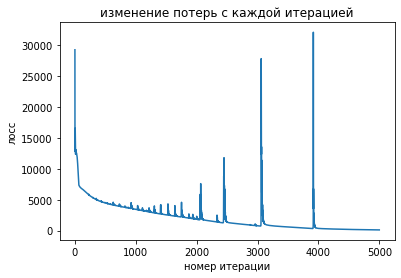

In [ ]:
plt.plot(loss_array[:])
plt.title("изменение потерь с каждой итерацией")
plt.xlabel('номер итерации')
plt.ylabel('лосс')

#### Создадим функцию для предсказания модели выводящую вектор значений, обработанный функцией softmax

In [ ]:
softmax=torch.nn.Softmax()

In [ ]:
def predict(X):
    y_pr=[]
    for i in range(X):
        y_pr.append(softmax(y_pred[i]).round().argmax())
    return y_pr

In [ ]:
print("Финальный лосс ",loss.data)

Финальный лосс  tensor(112.8720)


#### Протестируем модель на тестовой выборке

In [ ]:
y_pr=predict(y_pred.shape[0])
Y=net(torch.autograd.Variable(torch.FloatTensor(X_test))).detach().numpy()
Y=predict(Y.shape[0])

сохраним модель

In [ ]:
torch.save(net,'/Users/igorrachev/Downloads/pytorch_Net')

In [ ]:
# torch.load()

In [ ]:
print('R^2: ', metrics.r2_score(y_test,Y))
print('MAE: ',metrics.mean_absolute_error(y_test,Y))
print('Test ROC-AUC: ', roc_auc_score(y_test, Y))
print(metrics.classification_report(y_test,Y))

R^2:  -1.037703984893354
MAE:  0.19258779737821655
Test ROC-AUC:  0.49530051173929834
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      5526
           1       0.10      0.10      0.10       653

    accuracy                           0.81      6179
   macro avg       0.50      0.50      0.50      6179
weighted avg       0.81      0.81      0.81      6179



## SVM

In [ ]:
from sklearn.svm import SVC

#### Создадим объект SVM

In [ ]:
Svc=SVC()

#### Построим сетку параметров и протестируем модель

In [ ]:
grid={'kernel':['linear', 'poly', 'rbf', 'sigmoid']}
gs=GridSearchCV(Svc, grid, cv=5)
gs.fit(X_train_S[:2000], y_train_S[:2000])

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
gs.best_params_['kernel']

'rbf'

#### протестируем модель

In [ ]:
Svc=SVC(kernel=gs.best_params_['kernel'])

Svc.fit(X_train_S, y_train_S)
Svc.score(X_test_S, y_test_S)

0.9054263565891473

#### сделаем предсказания

In [ ]:
a=Svc.predict(X_test_S)
a

array([0, 0, 1, ..., 1, 1, 0])

Text(0, 0.5, 'количество элементов в классе')

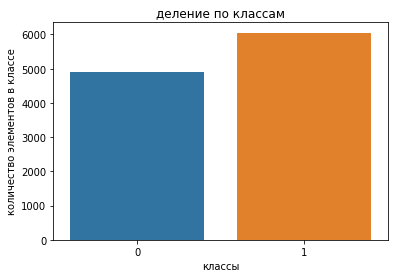

In [ ]:
sns.countplot(a)
plt.title("деление по классам")
plt.xlabel('классы')
plt.ylabel('количество элементов в классе')

#### посчитаем метрики

In [ ]:
print('R^2: ', metrics.r2_score(y_test_S,a))
print('MAE: ',metrics.mean_absolute_error(y_test_S,a))
print('Test ROC-AUC: ', roc_auc_score(y_test_S,a))
print(metrics.classification_report(y_test_S,a))

R^2:  0.6217052721833145
MAE:  0.09457364341085271
Test ROC-AUC:  0.9053934230835438
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      5479
           1       0.87      0.96      0.91      5486

    accuracy                           0.91     10965
   macro avg       0.91      0.91      0.91     10965
weighted avg       0.91      0.91      0.91     10965



## Catboost classifier

In [ ]:
# pip install catboost

In [ ]:
from catboost import CatBoostClassifier

#### создадим объект класса CatBoostClassifier

In [ ]:
model = CatBoostClassifier(
    iterations=1000,
    loss_function='Logloss',#Logloss , CrossEntropy
    task_type="CPU",
    devices='0',
    learning_rate=0.04)

#### обучим модель

In [ ]:
model.fit(X_train,
          y_train,
          verbose=True,
          plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6217796	total: 21.5ms	remaining: 21.5s
1:	learn: 0.5723815	total: 40.1ms	remaining: 20s
2:	learn: 0.5207446	total: 54.6ms	remaining: 18.2s
3:	learn: 0.4839808	total: 69.4ms	remaining: 17.3s
4:	learn: 0.4517351	total: 82.2ms	remaining: 16.4s
5:	learn: 0.4232869	total: 96.6ms	remaining: 16s
6:	learn: 0.3979946	total: 111ms	remaining: 15.7s
7:	learn: 0.3772817	total: 126ms	remaining: 15.7s
8:	learn: 0.3589001	total: 140ms	remaining: 15.5s
9:	learn: 0.3414048	total: 155ms	remaining: 15.3s
10:	learn: 0.3231053	total: 170ms	remaining: 15.3s
11:	learn: 0.3054089	total: 186ms	remaining: 15.3s
12:	learn: 0.2953449	total: 201ms	remaining: 15.3s
13:	learn: 0.2835180	total: 216ms	remaining: 15.2s
14:	learn: 0.2755714	total: 230ms	remaining: 15.1s
15:	learn: 0.2679107	total: 244ms	remaining: 15s
16:	learn: 0.2607386	total: 259ms	remaining: 15s
17:	learn: 0.2555005	total: 274ms	remaining: 14.9s
18:	learn: 0.2513844	total: 289ms	remaining: 14.9s
19:	learn: 0.2468657	total: 302ms	remaining

168:	learn: 0.1696833	total: 2.06s	remaining: 10.1s
169:	learn: 0.1696261	total: 2.08s	remaining: 10.1s
170:	learn: 0.1695532	total: 2.09s	remaining: 10.1s
171:	learn: 0.1694234	total: 2.11s	remaining: 10.2s
172:	learn: 0.1693631	total: 2.13s	remaining: 10.2s
173:	learn: 0.1693191	total: 2.14s	remaining: 10.2s
174:	learn: 0.1691962	total: 2.15s	remaining: 10.2s
175:	learn: 0.1691044	total: 2.17s	remaining: 10.2s
176:	learn: 0.1690710	total: 2.18s	remaining: 10.2s
177:	learn: 0.1690016	total: 2.2s	remaining: 10.2s
178:	learn: 0.1689474	total: 2.21s	remaining: 10.1s
179:	learn: 0.1689183	total: 2.23s	remaining: 10.1s
180:	learn: 0.1688523	total: 2.23s	remaining: 10.1s
181:	learn: 0.1688066	total: 2.24s	remaining: 10.1s
182:	learn: 0.1687091	total: 2.25s	remaining: 10s
183:	learn: 0.1685874	total: 2.26s	remaining: 10s
184:	learn: 0.1685423	total: 2.27s	remaining: 10s
185:	learn: 0.1684448	total: 2.28s	remaining: 9.99s
186:	learn: 0.1683296	total: 2.29s	remaining: 9.96s
187:	learn: 0.16827

345:	learn: 0.1593113	total: 3.89s	remaining: 7.36s
346:	learn: 0.1592954	total: 3.9s	remaining: 7.35s
347:	learn: 0.1592324	total: 3.92s	remaining: 7.33s
348:	learn: 0.1592169	total: 3.92s	remaining: 7.32s
349:	learn: 0.1591482	total: 3.93s	remaining: 7.3s
350:	learn: 0.1590918	total: 3.95s	remaining: 7.3s
351:	learn: 0.1590737	total: 3.96s	remaining: 7.29s
352:	learn: 0.1590265	total: 3.97s	remaining: 7.27s
353:	learn: 0.1589712	total: 3.98s	remaining: 7.25s
354:	learn: 0.1589581	total: 3.98s	remaining: 7.24s
355:	learn: 0.1589066	total: 3.99s	remaining: 7.22s
356:	learn: 0.1588592	total: 4s	remaining: 7.2s
357:	learn: 0.1587858	total: 4s	remaining: 7.18s
358:	learn: 0.1587465	total: 4.01s	remaining: 7.16s
359:	learn: 0.1586588	total: 4.02s	remaining: 7.15s
360:	learn: 0.1586038	total: 4.03s	remaining: 7.13s
361:	learn: 0.1585621	total: 4.04s	remaining: 7.11s
362:	learn: 0.1585501	total: 4.04s	remaining: 7.09s
363:	learn: 0.1584927	total: 4.05s	remaining: 7.08s
364:	learn: 0.1584314	

509:	learn: 0.1518062	total: 5.32s	remaining: 5.11s
510:	learn: 0.1517591	total: 5.33s	remaining: 5.1s
511:	learn: 0.1517205	total: 5.35s	remaining: 5.1s
512:	learn: 0.1516715	total: 5.36s	remaining: 5.09s
513:	learn: 0.1516246	total: 5.38s	remaining: 5.08s
514:	learn: 0.1515975	total: 5.39s	remaining: 5.08s
515:	learn: 0.1515589	total: 5.41s	remaining: 5.07s
516:	learn: 0.1515090	total: 5.42s	remaining: 5.07s
517:	learn: 0.1514846	total: 5.44s	remaining: 5.06s
518:	learn: 0.1514454	total: 5.45s	remaining: 5.05s
519:	learn: 0.1514011	total: 5.46s	remaining: 5.04s
520:	learn: 0.1513525	total: 5.48s	remaining: 5.04s
521:	learn: 0.1513431	total: 5.49s	remaining: 5.03s
522:	learn: 0.1513016	total: 5.5s	remaining: 5.02s
523:	learn: 0.1512552	total: 5.52s	remaining: 5.01s
524:	learn: 0.1512261	total: 5.53s	remaining: 5.01s
525:	learn: 0.1511836	total: 5.55s	remaining: 5s
526:	learn: 0.1511522	total: 5.56s	remaining: 4.99s
527:	learn: 0.1511181	total: 5.58s	remaining: 4.99s
528:	learn: 0.1511

674:	learn: 0.1455023	total: 7.61s	remaining: 3.66s
675:	learn: 0.1454325	total: 7.62s	remaining: 3.65s
676:	learn: 0.1453837	total: 7.64s	remaining: 3.64s
677:	learn: 0.1453519	total: 7.65s	remaining: 3.63s
678:	learn: 0.1453328	total: 7.66s	remaining: 3.62s
679:	learn: 0.1453093	total: 7.67s	remaining: 3.61s
680:	learn: 0.1452809	total: 7.68s	remaining: 3.6s
681:	learn: 0.1452393	total: 7.68s	remaining: 3.58s
682:	learn: 0.1451946	total: 7.69s	remaining: 3.57s
683:	learn: 0.1451466	total: 7.71s	remaining: 3.56s
684:	learn: 0.1451214	total: 7.71s	remaining: 3.55s
685:	learn: 0.1450641	total: 7.72s	remaining: 3.54s
686:	learn: 0.1450356	total: 7.73s	remaining: 3.52s
687:	learn: 0.1449991	total: 7.74s	remaining: 3.51s
688:	learn: 0.1449724	total: 7.75s	remaining: 3.5s
689:	learn: 0.1449234	total: 7.76s	remaining: 3.49s
690:	learn: 0.1449051	total: 7.77s	remaining: 3.47s
691:	learn: 0.1448359	total: 7.78s	remaining: 3.46s
692:	learn: 0.1448035	total: 7.79s	remaining: 3.45s
693:	learn: 0.

846:	learn: 0.1394499	total: 9.63s	remaining: 1.74s
847:	learn: 0.1394357	total: 9.65s	remaining: 1.73s
848:	learn: 0.1394040	total: 9.66s	remaining: 1.72s
849:	learn: 0.1393923	total: 9.67s	remaining: 1.71s
850:	learn: 0.1393533	total: 9.67s	remaining: 1.69s
851:	learn: 0.1393150	total: 9.68s	remaining: 1.68s
852:	learn: 0.1392747	total: 9.69s	remaining: 1.67s
853:	learn: 0.1392396	total: 9.7s	remaining: 1.66s
854:	learn: 0.1391950	total: 9.71s	remaining: 1.65s
855:	learn: 0.1391735	total: 9.71s	remaining: 1.63s
856:	learn: 0.1391495	total: 9.73s	remaining: 1.62s
857:	learn: 0.1391424	total: 9.74s	remaining: 1.61s
858:	learn: 0.1391255	total: 9.75s	remaining: 1.6s
859:	learn: 0.1391071	total: 9.76s	remaining: 1.59s
860:	learn: 0.1390895	total: 9.77s	remaining: 1.58s
861:	learn: 0.1390557	total: 9.78s	remaining: 1.56s
862:	learn: 0.1390224	total: 9.79s	remaining: 1.55s
863:	learn: 0.1389929	total: 9.8s	remaining: 1.54s
864:	learn: 0.1389487	total: 9.82s	remaining: 1.53s
865:	learn: 0.1

#### сделаем предсказания

In [ ]:
preds = model.predict(X_test)

#### посчитаем метрики

In [ ]:
print(metrics.r2_score(y_test, preds))
print('Test ROC-AUC: ', roc_auc_score(y_test, preds))
print(metrics.classification_report(y_test,preds))

0.11642415444960441
Test ROC-AUC:  0.7426444057577738
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5526
           1       0.63      0.52      0.57       653

    accuracy                           0.92      6179
   macro avg       0.79      0.74      0.76      6179
weighted avg       0.91      0.92      0.91      6179



# Финальная таблица результатов

In [ ]:
#XGB 4, Logistic regr 2, torch, catboost
data=[roc_auc_score(y_test,yhat).round(3),
      roc_auc_score(y_test_S,yhat_S).round(3),
      roc_auc_score(y_test_A,yhat_A).round(3),
      roc_auc_score(y_test,yhat_P).round(3),
      roc_auc_score(y_test, y_predicted).round(3),
      roc_auc_score(y_test_S, y_predicted_S).round(3),
      roc_auc_score(y_test, Y).round(3),
      roc_auc_score(y_test_S,a).round(3),
      roc_auc_score(y_test, preds).round(3)
     ]
data

[0.741, 0.95, 0.948, 0.735, 0.697, 0.874, 0.495, 0.905, 0.743]

In [ ]:
cols=['XGB',
      'XGB_SMOTE',
      'XGB_ADASYN',
      'XGB_Polynom',
      'Logistic',
      'Logistic_SMOTE',
      'Pytorch',
      'SVR',
      'Catboost']

### Сравнение моделей и вариантов обработки данных по показателю ROC_AUC

In [ ]:
final=pd.DataFrame(data,cols).T

In [ ]:
final

,XGB,XGB_SMOTE,XGB_ADASYN,XGB_Polynom,Logistic,Logistic_SMOTE,Pytorch,SVR,Catboost
0,0.741,0.95,0.948,0.735,0.697,0.874,0.495,0.905,0.743
